<a href="https://colab.research.google.com/github/alexlee-gk/slac/blob/master/data/dm_control_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import glob
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['legend.loc'] = 'lower right'
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

In [ ]:
%%bash
# download data directory if it doesn't exist
if [ ! -d "data" ]; then
  wget https://github.com/alexlee-gk/slac/archive/master.zip
  unzip master.zip
  mv slac-master/data ./
  rm -r master.zip slac-master
fi

In [3]:
def read_csvs_slac(env_name):
  fnames = glob.glob(
      f'data/slac/dm_control_{env_name}_ar[0-9]*_slac_[0-9]*.csv')
  assert len(fnames) == 5
  dfs = []
  for trial_id, fname in enumerate(fnames):
    df = pd.read_csv(fname)
    df['trial_id'] = trial_id
    df['OriginalEnvironmentStepMillions'] = df['OriginalEnvironmentSteps'] / 1e6
    dfs.append(df)
  return pd.concat(dfs)

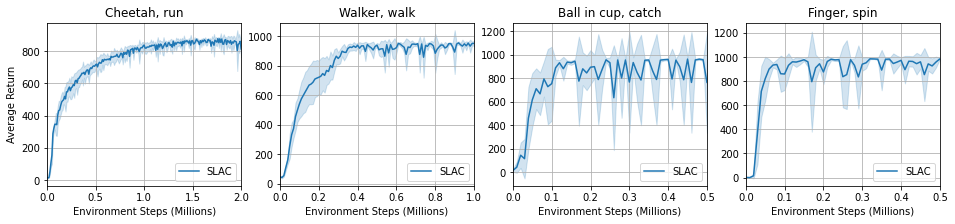

In [4]:
env_name_to_title = {
    'cheetah_run': 'Cheetah, run',
    'walker_walk': 'Walker, walk' ,
    'ball_in_cup_catch': 'Ball in cup, catch',
    'finger_spin': 'Finger, spin',
}
env_name_to_xlim = {
    'cheetah_run': 2,
    'walker_walk': 1,
    'ball_in_cup_catch': 0.5,
    'finger_spin': 0.5,    
}

fig, axs = plt.subplots(1, 4, figsize=(16, 3))
for i, (env_name, ax) in enumerate(zip(env_name_to_title, axs)):
  data = read_csvs_slac(env_name)
  sns.lineplot(x='OriginalEnvironmentStepMillions', y='AverageReturnEvalPolicy',
               data=data, ci='sd', label='SLAC', ax=ax)
  ax.grid()
  ax.set_title(env_name_to_title[env_name])
  ax.set_xlabel('Environment Steps (Millions)')
  ax.set_ylabel('Average Return' if i == 0 else None)
  ax.set_xlim(0, env_name_to_xlim[env_name])